Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#  Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in the dataset

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no categorial feature in the dataset

In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
scaler =StandardScaler()

# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [9]:
## Independent and dependent feature
X = df.drop(labels=['target'],axis = 1)
y = df.target

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test =train_test_split(X,y ,test_size=0.30,random_state=30)

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)

In [16]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0])

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,recall_score

In [20]:
print(confusion_matrix(y_test,y_pred))

[[34  6]
 [ 8 43]]


In [21]:
print(accuracy_score(y_test,y_pred))

0.8461538461538461


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.88      0.84      0.86        51

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91



# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [23]:
imp_feature = clf.feature_importances_

In [24]:
imp_feature

array([0.08340917, 0.04030836, 0.12403717, 0.08482648, 0.07234647,
       0.00884082, 0.01823209, 0.16090415, 0.06213141, 0.10042616,
       0.06377475, 0.08534861, 0.09541437])

In [25]:
feature_name =X.columns

In [26]:
feature_name

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [27]:
## create dataframe of important feature
feature_df = pd.DataFrame({'Features':feature_name, "Importance": imp_feature})

# sort the dataframe by feature importance
feature_df  = feature_df.sort_values(by ='Importance',ascending= False)

In [28]:
feature_df

,Features,Importance
7,thalach,0.160904
2,cp,0.124037
9,oldpeak,0.100426
12,thal,0.095414
11,ca,0.085349
3,trestbps,0.084826
0,age,0.083409
4,chol,0.072346
10,slope,0.063775
8,exang,0.062131


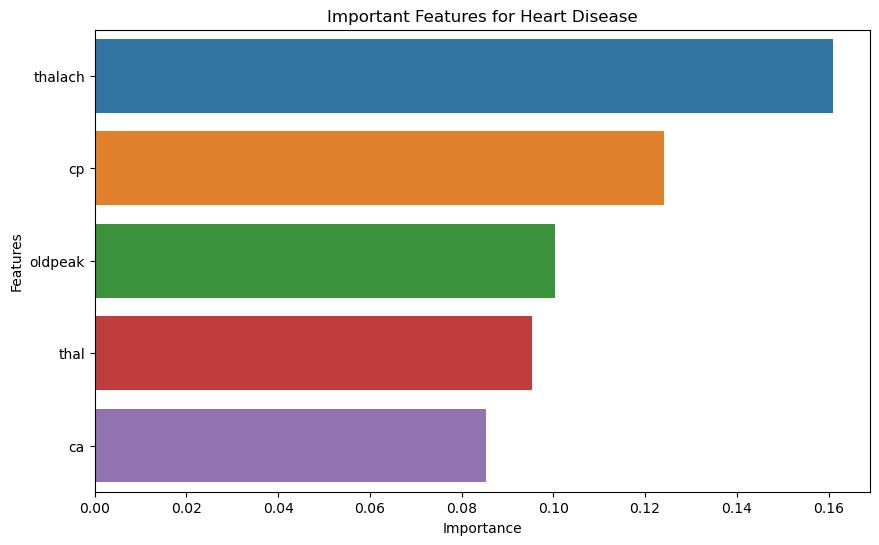

In [29]:
plt.figure(figsize =(10,6))
sns.barplot(x='Importance', y ='Features',data=feature_df.head(5))
plt.title('Important Features for Heart Disease')
plt.show()

In [ ]:
X

# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [30]:
from sklearn.model_selection import GridSearchCV

params=   { 'n_estimators':[50,60,100,200],
            'max_depth':[1,2,3,5,10,20,30,None],
            'min_samples_split': [1,2, 5, 10],
            'min_samples_leaf': [1, 2,3,4]
}

In [31]:
gsv = GridSearchCV(clf,param_grid=params ,cv =5)

In [32]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [50, 60, 100, 200]})

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [33]:
gsv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 60}

In [34]:
new_clf = RandomForestClassifier(n_estimators=60,max_depth=10,min_samples_leaf=1,min_samples_split= 10 ,random_state=42)

In [35]:
new_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=60,
                       random_state=42)

In [36]:
y_pred1 = new_clf.predict(X_test)

In [37]:
y_pred1

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0])

In [38]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8571428571428571
Precision: 0.9130434782608695
Recall: 0.8235294117647058
F1 Score: 0.865979381443299


In [39]:
print(confusion_matrix(y_test,y_pred1))


[[36  4]
 [ 9 42]]


In [40]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.91      0.82      0.87        51

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [41]:
feature_df.head(2)

,Features,Importance
7,thalach,0.160904
2,cp,0.124037


NameError: name 'plot_decision_boundary' is not defined

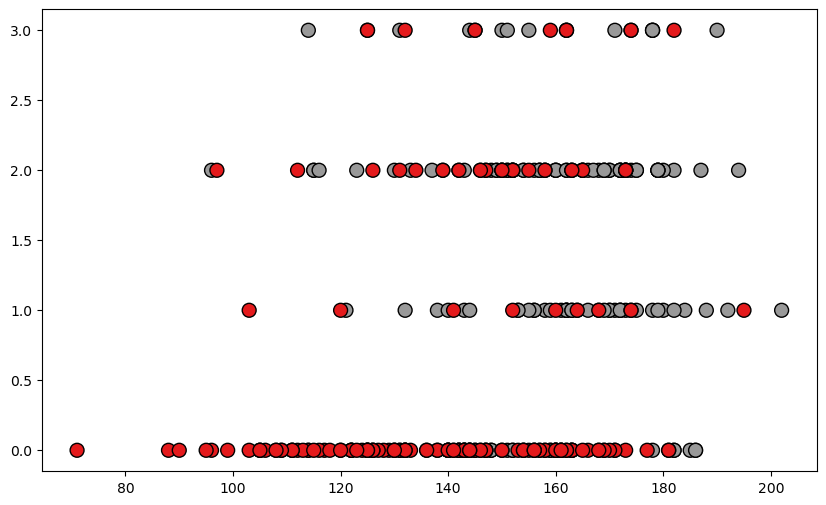

In [46]:
# Step 1: Get the top two most important features
top_two_features = feature_df.head(2)

# Step 2: Get the indices of the top two features
top_feature_indices = top_two_features.index

# Step 3: Get the names of the top two features
top_feature_names = top_two_features['Features'].values

# Step 4: Extract the top two features from the training data
X_top_two = X.iloc[:, top_feature_indices]

# Step 5: Train the random forest classifier on the top two features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_top_two, y)

# Step 6: Plot the decision boundaries on a scatter plot of the top two features
plt.figure(figsize=(10, 6))
plt.scatter(X_top_two.iloc[:, 0], X_top_two.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=100)

# Plot decision boundaries
plot_decision_boundary(rf_classifier, X_top_two.values, mesh_step=0.02)

plt.xlabel(top_feature_names[0])
plt.ylabel(top_feature_names[1])
plt.title('Decision Boundaries of Random Forest Classifier')

plt.show()